In [1]:
import numpy as np
from kdezero import Variable, Model
from kdezero.utils import plot_dot_graph
import kdezero.functions as F
import matplotlib.pyplot as plt
import kdezero.layers as L
from kdezero import optimizers
from kdezero.models import MLP
from kdezero import datasets
import math
import kdezero
from kdezero import DataLoader

In [2]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


In [5]:
x = Variable(np.random.randn(1, 2, 3))
print(x)
y = x.reshape((2, 3))
print(y)
y = x.reshape(2, 3)
print(y)

variable([[[-0.44496268 -0.71000492 -0.0781721 ]
           [ 0.7889931  -1.31355772  0.39044899]]])
variable([[-0.44496268 -0.71000492 -0.0781721 ]
          [ 0.7889931  -1.31355772  0.39044899]])
variable([[-0.44496268 -0.71000492 -0.0781721 ]
          [ 0.7889931  -1.31355772  0.39044899]])


In [3]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.transpose(x)
y.backward(retain_grad=True)
print(x.grad)
print(y.grad)

variable([[1 1 1]
          [1 1 1]])
variable([[1 1]
          [1 1]
          [1 1]])


In [3]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = x.transpose()
y.backward(retain_grad=True)
print(x.grad)
print(y.grad)

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = x.T
y.backward(retain_grad=True)
print(x.grad)
print(y.grad)

variable([[1 1 1]
          [1 1 1]])
variable([[1 1]
          [1 1]
          [1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1]
          [1 1]
          [1 1]])


In [2]:
x = Variable(np.random.rand(1, 2, 3, 4))
print(x)
y = x.transpose(1, 0, 3, 2)
y.backward(retain_grad=True)
print(x.grad)
print(y.grad)
print(y)

variable([[[[0.67896932 0.788375   0.51260571 0.60458275]
            [0.70414355 0.0767171  0.18420816 0.27504341]
            [0.00416768 0.55407867 0.18721799 0.77130623]]
         
           [[0.54663742 0.60545831 0.97274262 0.82604792]
            [0.11557495 0.74382158 0.60566996 0.67324778]
            [0.09215439 0.59391866 0.5173335  0.42114142]]]])
variable([[[[1. 1. 1. 1.]
            [1. 1. 1. 1.]
            [1. 1. 1. 1.]]
         
           [[1. 1. 1. 1.]
            [1. 1. 1. 1.]
            [1. 1. 1. 1.]]]])
variable([[[[1. 1. 1.]
            [1. 1. 1.]
            [1. 1. 1.]
            [1. 1. 1.]]]
         
         
          [[[1. 1. 1.]
            [1. 1. 1.]
            [1. 1. 1.]
            [1. 1. 1.]]]])
variable([[[[0.67896932 0.70414355 0.00416768]
            [0.788375   0.0767171  0.55407867]
            [0.51260571 0.18420816 0.18721799]
            [0.60458275 0.27504341 0.77130623]]]
         
         
          [[[0.54663742 0.11557495 0.09215439]

In [2]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 / x1
print(y)

y.backward()
print(x1.grad)

variable([0.1 0.2 0.3])
variable([-0.06])


In [2]:
x = Variable(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([1 1 1 1 1 1])


In [3]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([[1 1 1]
          [1 1 1]])


In [4]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sum(x, axis=0)
y.backward()
print(y)
print(x.grad)

x = Variable(np.random.randn(2, 3, 4, 5))
y = x.sum(keepdims=True)
y.backward()
print(y.shape)
print(x.grad)

variable([5 7 9])
variable([[1 1 1]
          [1 1 1]])
(1, 1, 1, 1)
variable([[[[1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]]
         
           [[1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]]
         
           [[1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]]]
         
         
          [[[1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]]
         
           [[1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]]
         
           [[1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]
            [1. 1. 1. 1. 1.]]]])


In [3]:
x = Variable(np.random.randn(2, 3))
W = Variable(np.random.randn(3, 4))
y = F.matmul(x, W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

# def mean_squared_error(x0, x1):
#     diff = x0 - x1
#     return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.2475948546674987)
variable(0.23786120447054826)
variable(0.21222231333102934)
variable(0.16742181117834185)
variable(0.09681932619992686)
variable(0.07849528290602335)
variable(0.07749729552991157)
variable(0.0772213239955932)


In [4]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10)
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.0788816650635515)
variable(0.07655073683421636)
variable(0.0763780308623822)
variable(0.07618764131185572)


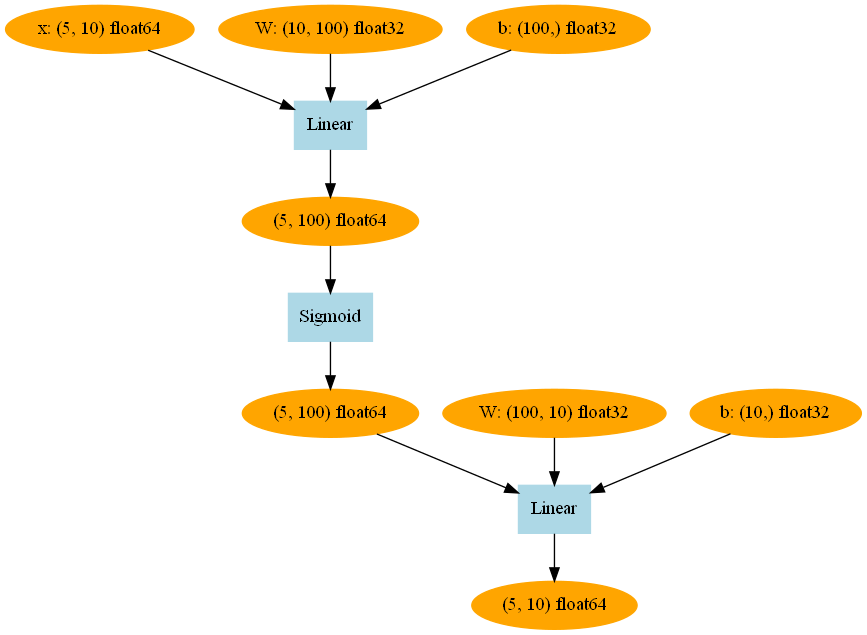

In [3]:
class TowLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

x = Variable(np.random.randn(5, 10), name='x')
model = TowLayerNet(100, 10)
model.plot(x)

In [4]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

class TowLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TowLayerNet(hidden_size, 1)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.0788816650635515)
variable(0.07655073683421636)
variable(0.0763780308623822)
variable(0.07618764131185572)


In [4]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.0788816650635515)
variable(0.07655073683421636)
variable(0.0763780308623822)
variable(0.07618764131185572)


In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.MomentumSGD(lr)
optimizer.setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.07743134827996008)
variable(0.07544895146731473)
variable(0.07463260305858642)
variable(0.07420983776361516)
variable(0.07397000396385318)
variable(0.07383179319278564)
variable(0.07375198316276851)
variable(0.07370578149495666)
variable(0.07367887538341851)


In [3]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.get_item(x, 1)
print(y)
y.backward()
print(x.grad)

variable([4 5 6])
variable([[0. 0. 0.]
          [1. 1. 1.]])


In [4]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.get_item(x, [0, 0, 1])
print(y)
y.backward()
print(x.grad)

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])
variable([[2. 2. 2.]
          [1. 1. 1.]])


In [3]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = x[1]
print(y)
y.backward()
print(x.grad)

variable([4 5 6])
variable([[0. 0. 0.]
          [1. 1. 1.]])


In [4]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x.max(axis=1, keepdims=True)

array([[3],
       [6]])

In [2]:
model = MLP((10, 3))

x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2, 0, 1, 0])
y = model(x)
print(y)

loss = F.softmax_cross_entropy(y, t)
print(loss)

variable([[-0.09907545  0.80404522  0.25896994]
          [ 0.03931895  0.59199818  0.26970795]
          [-0.39121382  1.2116953   0.31731228]
          [-0.11999959  0.82979856  0.44505524]])
variable(1.1921845964066193)


In [2]:
x, t = datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10], t[10])
print(x[110], t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


In [2]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size: (i + 1) *  batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    avg_loss = sum_loss / data_size
    print('epoch %d, lo %.2f' % (epoch + 1, avg_loss))

epoch 1, lo 1.13
epoch 2, lo 1.05
epoch 3, lo 0.95
epoch 4, lo 0.92
epoch 5, lo 0.87
epoch 6, lo 0.89
epoch 7, lo 0.84
epoch 8, lo 0.78
epoch 9, lo 0.80
epoch 10, lo 0.79
epoch 11, lo 0.78
epoch 12, lo 0.76
epoch 13, lo 0.77
epoch 14, lo 0.76
epoch 15, lo 0.76
epoch 16, lo 0.77
epoch 17, lo 0.78
epoch 18, lo 0.74
epoch 19, lo 0.74
epoch 20, lo 0.72
epoch 21, lo 0.73
epoch 22, lo 0.74
epoch 23, lo 0.77
epoch 24, lo 0.73
epoch 25, lo 0.74
epoch 26, lo 0.74
epoch 27, lo 0.72
epoch 28, lo 0.72
epoch 29, lo 0.72
epoch 30, lo 0.73
epoch 31, lo 0.71
epoch 32, lo 0.72
epoch 33, lo 0.72
epoch 34, lo 0.71
epoch 35, lo 0.72
epoch 36, lo 0.71
epoch 37, lo 0.71
epoch 38, lo 0.70
epoch 39, lo 0.71
epoch 40, lo 0.70
epoch 41, lo 0.71
epoch 42, lo 0.70
epoch 43, lo 0.70
epoch 44, lo 0.70
epoch 45, lo 0.69
epoch 46, lo 0.69
epoch 47, lo 0.71
epoch 48, lo 0.70
epoch 49, lo 0.69
epoch 50, lo 0.69
epoch 51, lo 0.68
epoch 52, lo 0.67
epoch 53, lo 0.68
epoch 54, lo 0.70
epoch 55, lo 0.68
epoch 56, lo 0.66
e

In [6]:
print(x[10], t[10], model(x[10]))
print(x[110], t[110], model(x[110]))

[-0.12995958 -0.00324155] 1 variable([-4.0917854   3.2415352   0.11706614])
[ 0.3282343  -0.54941994] 0 variable([ 4.560401  -6.4638186  1.0734416])


In [2]:
train_set = kdezero.datasets.Spiral(train=True)
print(train_set[0])
print(len(train_set))

(array([-0.13981389, -0.00721657], dtype=float32), 1)
300


In [3]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = datasets.Spiral()
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size: (i + 1) *  batch_size]
        batch = [train_set[i] for i in batch_index]
        batch_x = np.array([exsample[0] for exsample in batch])
        batch_t = np.array([exsample[1] for exsample in batch])

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    avg_loss = sum_loss / data_size
    print('epoch %d, lo %.2f' % (epoch + 1, avg_loss))

epoch 1, lo 1.13
epoch 2, lo 1.05
epoch 3, lo 0.95
epoch 4, lo 0.92
epoch 5, lo 0.87
epoch 6, lo 0.89
epoch 7, lo 0.84
epoch 8, lo 0.78
epoch 9, lo 0.80
epoch 10, lo 0.79
epoch 11, lo 0.78
epoch 12, lo 0.76
epoch 13, lo 0.77
epoch 14, lo 0.76
epoch 15, lo 0.76
epoch 16, lo 0.77
epoch 17, lo 0.78
epoch 18, lo 0.74
epoch 19, lo 0.74
epoch 20, lo 0.72
epoch 21, lo 0.73
epoch 22, lo 0.74
epoch 23, lo 0.77
epoch 24, lo 0.73
epoch 25, lo 0.74
epoch 26, lo 0.74
epoch 27, lo 0.72
epoch 28, lo 0.72
epoch 29, lo 0.72
epoch 30, lo 0.73
epoch 31, lo 0.71
epoch 32, lo 0.72
epoch 33, lo 0.72
epoch 34, lo 0.71
epoch 35, lo 0.72
epoch 36, lo 0.71
epoch 37, lo 0.71
epoch 38, lo 0.70
epoch 39, lo 0.71
epoch 40, lo 0.70
epoch 41, lo 0.71
epoch 42, lo 0.70
epoch 43, lo 0.70
epoch 44, lo 0.70
epoch 45, lo 0.69
epoch 46, lo 0.69
epoch 47, lo 0.71
epoch 48, lo 0.70
epoch 49, lo 0.69
epoch 50, lo 0.69
epoch 51, lo 0.68
epoch 52, lo 0.67
epoch 53, lo 0.68
epoch 54, lo 0.70
epoch 55, lo 0.68
epoch 56, lo 0.66
e

In [5]:
batch_size = 10
max_epoch = 1

train_set = datasets.Spiral(train=True)
test_set = datasets.Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape)
        break

    for x, t in test_loader:
        print(x.shape, t.shape)
        break

(10, 2) (10,)
(10, 2) (10,)


In [2]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = datasets.Spiral(train=True)
test_set = datasets.Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch + 1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)
    ))

    sum_loss, sum_acc = 0, 0
    with kdezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)
    ))

: 0.6667
test loss: 0.6076, accuracy: 0.6967
epoch: 63
train loss: 0.5914, accuracy: 0.6700
test loss: 0.6020, accuracy: 0.6300
epoch: 64
train loss: 0.5911, accuracy: 0.6867
test loss: 0.5981, accuracy: 0.6533
epoch: 65
train loss: 0.5626, accuracy: 0.7000
test loss: 0.6124, accuracy: 0.7100
epoch: 66
train loss: 0.5707, accuracy: 0.7067
test loss: 0.5760, accuracy: 0.6567
epoch: 67
train loss: 0.5574, accuracy: 0.6900
test loss: 0.5834, accuracy: 0.6967
epoch: 68
train loss: 0.5560, accuracy: 0.7133
test loss: 0.5589, accuracy: 0.6933
epoch: 69
train loss: 0.5355, accuracy: 0.7267
test loss: 0.5530, accuracy: 0.6967
epoch: 70
train loss: 0.5303, accuracy: 0.7300
test loss: 0.5380, accuracy: 0.7267
epoch: 71
train loss: 0.5207, accuracy: 0.7167
test loss: 0.5315, accuracy: 0.7367
epoch: 72
train loss: 0.5094, accuracy: 0.7533
test loss: 0.5340, accuracy: 0.7367
epoch: 73
train loss: 0.5110, accuracy: 0.7400
test loss: 0.5127, accuracy: 0.7433
epoch: 74
train loss: 0.4921, accuracy: 0.

In [3]:
train_set = kdezero.datasets.MNIST(train=True, transform=None)
test_set = kdezero.datasets.MNIST(train=False, transform=None)

print(len(train_set))
print(len(test_set))

Downloading: t10k-images-idx3-ubyte.gz
[##############################] 100.00% Done
Downloading: t10k-labels-idx1-ubyte.gz
[##############################] 100.00% Done
60000
10000


In [4]:
x, t = train_set[0]
print(type(x), x.shape)
print(t)

<class 'numpy.ndarray'> (1, 28, 28)
5


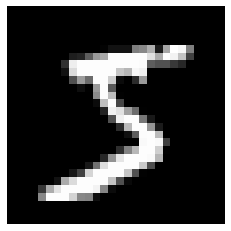

label: 5


In [6]:
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

In [8]:
max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = kdezero.datasets.MNIST(train=True)
test_set = kdezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.SGD().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch + 1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)
    ))

    sum_loss, sum_acc = 0, 0
    with kdezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)
    ))

epoch: 1
train loss: 1.9280, accuracy: 0.5447
test loss: 1.5457, accuracy: 0.7461
epoch: 2
train loss: 1.2896, accuracy: 0.7677
test loss: 1.0481, accuracy: 0.8080
epoch: 3
train loss: 0.9264, accuracy: 0.8190
test loss: 0.7927, accuracy: 0.8446
epoch: 4
train loss: 0.7409, accuracy: 0.8403
test loss: 0.6591, accuracy: 0.8524
epoch: 5
train loss: 0.6357, accuracy: 0.8534
test loss: 0.5770, accuracy: 0.8639


In [2]:
max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = kdezero.datasets.MNIST(train=True)
test_set = kdezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch + 1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)
    ))

    sum_loss, sum_acc = 0, 0
    with kdezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)
    ))

epoch: 1
train loss: 0.1912, accuracy: 0.9421
test loss: 0.0956, accuracy: 0.9692
epoch: 2
train loss: 0.0742, accuracy: 0.9763
test loss: 0.0838, accuracy: 0.9730
epoch: 3
train loss: 0.0473, accuracy: 0.9848
test loss: 0.0740, accuracy: 0.9773
epoch: 4
train loss: 0.0344, accuracy: 0.9889
test loss: 0.0800, accuracy: 0.9769
epoch: 5
train loss: 0.0293, accuracy: 0.9901
test loss: 0.0713, accuracy: 0.9806
